# Big Data Science Assignment 1

# Question 1

In [16]:
########################################################
####             Loading Packages            ##########
#######################################################
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure
import itertools
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
#########################################################


dfRainFall = pd.read_csv('RwandaDistrictRainfall.csv')
dfVegetation = pd.read_csv('RwandaDistrictVegetation.csv')
dfDistrictCentroids = pd.read_csv('RwandaDistrictCentroidsLongitude-Latitude.csv')

dates = pd.to_datetime(pd.date_range(start='2000-1-1',end='2014-12-31',freq='M'))

#Transforming data to replace month names with Datetime objetcs
df_transpose_RainFall = dfRainFall.iloc[1:,1:].transpose() # Starting at index 5 removes data for JAN, FEB, MAR and APR in 2000
df_transpose_RainFall = pd.DataFrame(df_transpose_RainFall.to_numpy(dtype=float),columns=dfRainFall.iloc[1:,0].to_numpy())
df_transpose_RainFall['Timestamp'] = dates

# Starting at index 5 removes data for JAN, FEB, MAR and APR in 2000
df_trans_vegetation = dfVegetation.iloc[1:,1:].transpose()
df_trans_vegetation = pd.DataFrame(df_trans_vegetation.to_numpy(dtype=float),columns=dfVegetation.iloc[1:,0].to_numpy())
df_trans_vegetation['Timestamp'] = dates

# Question 2

C:\Users\Fidele NSANZUMUKUNZI\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


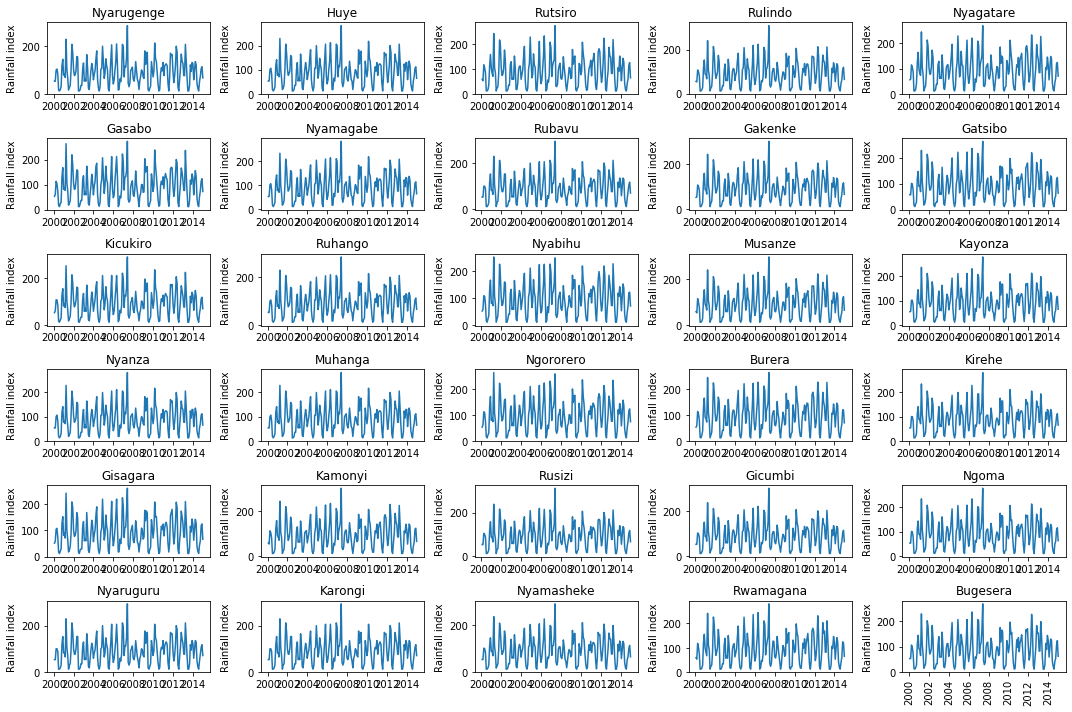

In [2]:
# Rain fall Data
fig, axs = plt.subplots(6, 5,figsize=(15,10))

rows,cols = dfRainFall.shape

row = 0
col = 0
district_names = df_transpose_RainFall.columns[:-1]

# Rainfall Index
for district in district_names:
    axs[row,col].locator_params(nbins=3)
    axs[row,col].plot(df_transpose_RainFall.Timestamp,df_transpose_RainFall[district])
    axs[row,col].set_title(district)
    axs[row,col].set_ylabel('Rainfall index')
    
    if row == 5:
        row = 0
        col = col + 1
    else:
        row = row + 1

plt.setp(plt.gca().xaxis.get_majorticklabels(),'rotation', 90)
plt.tight_layout()

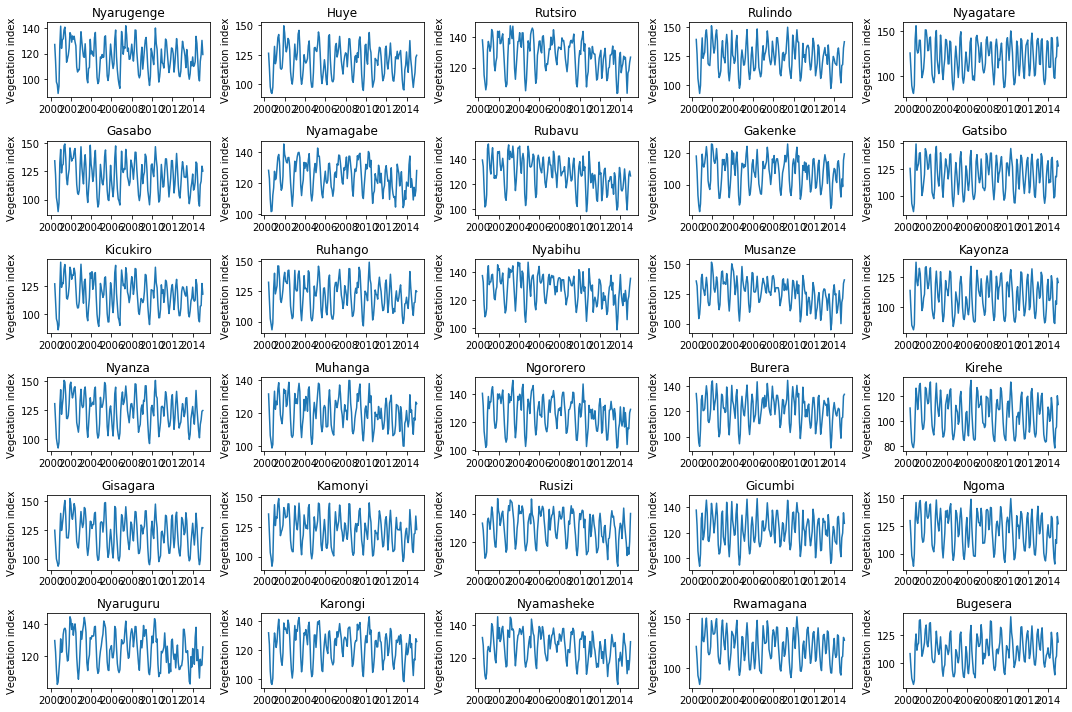

In [3]:
# Vegetation Index
fig, axs = plt.subplots(6, 5,figsize=(15,10))

rows,cols = dfVegetation.shape

row = 0
col = 0

district_names = df_trans_vegetation.columns[:-1]
for district in district_names:
    axs[row,col].locator_params(nbins=3)
    axs[row,col].plot(df_trans_vegetation.Timestamp.iloc[4:],df_trans_vegetation[district].iloc[4:].to_numpy(dtype=float))
    axs[row,col].set_title(district)
    axs[row,col].set_ylabel('Vegetation index')

    if row == 5:
        row = 0
        col = col + 1
    else:
        row = row + 1

plt.tight_layout()

# Question 3

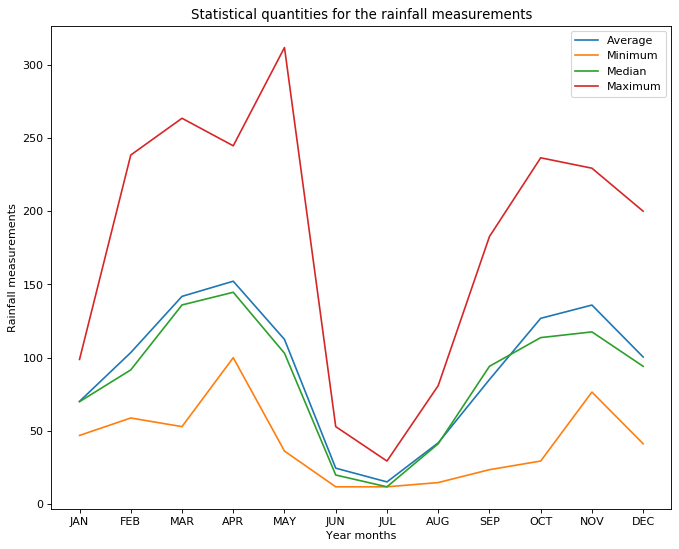

In [4]:
# Statistics for Rainfall Measurements
all_month_names = dfRainFall.iloc[0,5:].values

newPfRainFall = dfRainFall.iloc[1:,5:] # Stripping off data for JAN, FEB, MAR and APR in 2000
newPfRainFall = pd.DataFrame(newPfRainFall.values,columns=all_month_names)

month_names = ['JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC']

means_per_year_month = [np.mean(newPfRainFall[m_name].to_numpy(dtype=float)) for m_name in month_names]
mins_per_year_month = [newPfRainFall[m_name].min().min() for m_name in month_names]
medians_per_year_month = [newPfRainFall[m_name].median().median() for m_name in month_names]
maxs_per_year_month = [newPfRainFall[m_name].max().max() for m_name in month_names]

figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
plt.plot(month_names,means_per_year_month)
plt.plot(month_names,mins_per_year_month)
plt.plot(month_names,medians_per_year_month)
plt.plot(month_names,maxs_per_year_month)
plt.title('Statistical quantities for the rainfall measurements')
plt.xlabel('Year months')
plt.ylabel('Rainfall measurements')
plt.legend(['Average','Minimum','Median','Maximum'])
plt.show() 

In [35]:
newPfRainFall

,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,JAN,FEB,...,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
0,84.4,15.6,11.8,17.6,29.4,117.6,145.2,78.5,82.4,68.6,...,135.3,121.7,43.2,23.5,11.8,50.9,72.6,105.9,113.8,66.7
1,74.9,17.6,11.8,23.5,29.4,131.0,167.8,80.8,88.2,76.5,...,156.0,132.5,47.1,19.2,11.8,51.4,74.9,113.3,123.5,72.1
2,84.6,17.2,11.8,21.8,29.4,125.5,153.7,80.4,90.2,73.8,...,146.1,122.8,40.9,22.8,11.8,50.5,69.4,110.5,117.6,68.9
3,82.4,17.6,11.8,17.6,29.4,117.6,141.2,76.5,82.4,70.6,...,135.3,117.6,41.2,23.5,11.8,52.9,70.6,105.9,111.8,64.7
4,74.4,17.6,11.8,21.4,29.4,125.5,152.3,81.4,90.6,70.7,...,142.0,127.6,37.9,21.3,11.8,43.8,59.7,118.3,124.6,65.9
5,88.2,11.8,11.8,17.6,29.4,117.6,152.9,82.4,82.4,64.7,...,135.3,129.4,47.1,23.5,11.8,47.1,76.5,105.9,117.6,70.6
6,82.4,17.6,11.8,17.6,29.4,117.6,141.2,76.5,82.4,70.6,...,135.3,117.6,41.2,23.5,11.8,52.9,70.6,105.9,111.8,64.7
7,81.4,17.6,11.8,18.6,29.4,118.6,142.2,77.5,83.3,70.6,...,136.3,118.6,41.2,23.5,11.8,52.0,68.6,107.8,113.7,64.7
8,83.5,16.5,11.8,17.6,29.4,117.6,143.5,77.6,82.4,69.4,...,135.3,120.0,42.4,23.5,11.8,51.8,71.8,105.9,112.9,65.9
9,82.4,17.6,11.8,17.6,29.4,117.6,141.2,76.5,82.4,70.6,...,135.3,117.6,41.2,23.5,11.8,52.9,70.6,105.9,111.8,64.7


In [38]:
# Statistics for Vegetation index

df_newVegetation = dfVegetation.iloc[1:,5:] # Stripping off data for JAN, FEB, MAR and APR in 2000
df_newVegetation = pd.DataFrame(df_newVegetation.values,columns=all_month_names)

v_means_per_year_month = [np.mean(df_newVegetation[m_name].to_numpy(dtype=float)) for m_name in month_names]
# v_mins_per_year_month = [df_newVegetation[m_name].min().min() for m_name in month_names]
# v_medians_per_year_month = [df_newVegetation[m_name].median().median() for m_name in month_names]
# v_maxs_per_year_month = [df_newVegetation[m_name].max().max() for m_name in month_names]

# figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
# plt.plot(month_names,v_means_per_year_month)
# plt.plot(month_names,v_mins_per_year_month)
# plt.plot(month_names,v_medians_per_year_month)
# plt.plot(month_names,v_maxs_per_year_month)
# plt.title('Statistical quantities for Vegetation index')
# plt.xlabel('Year months')
# plt.ylabel('Vegetation index')
# plt.legend(['Average','Minimum','Median','Maximum'])
plt.show()

In [6]:
# d = df_trans_vegetation.iloc[4:].groupby(pd.Grouper(key='Timestamp', freq='M'))
# d.groups

# Question 4

C:\Users\Fidele NSANZUMUKUNZI\Anaconda3\lib\site-packages\ipykernel_launcher.py:56: RuntimeWarning: overflow encountered in multiply


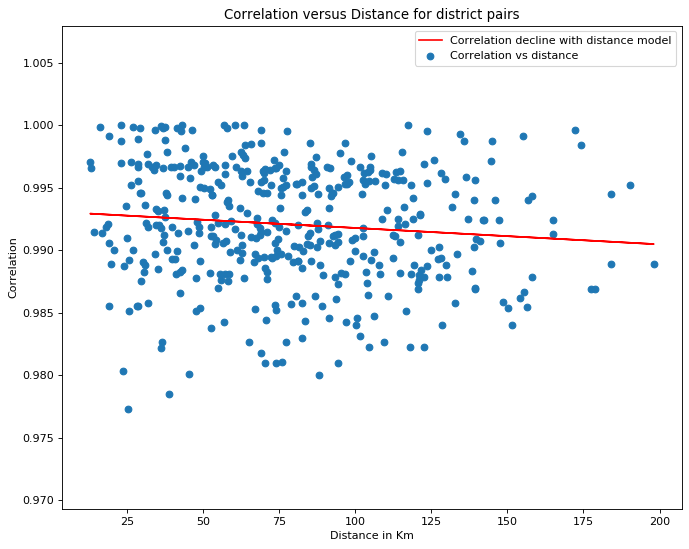

NameError: name 'c' is not defined

In [12]:
from math import radians, cos, sin, asin, sqrt
from scipy.optimize import curve_fit

def haversine(lon1, lat1, lon2, lat2):
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 6371 # Radius of earth in kilometers. Use 3956 for miles
    return c * r


df_transposeRainFall = dfRainFall.iloc[1:,1:].transpose()
df_transposeRainFall = pd.DataFrame(df_transposeRainFall.to_numpy(dtype=float),columns=dfRainFall.iloc[1:,0].to_numpy())

correlation = df_transposeRainFall.corr() #Computing correlation coefficients betwen districts

dfCentroids = dfDistrictCentroids.iloc[:,[-3,-2,-1]] #Selecting only District names, longitude and latitude columns

rows,cols = dfCentroids.shape
corr_distance_data = []
distric_names = dfCentroids.District.to_numpy() #In order of columns and rows of dfCentroids

#Getting correlation and distances data between districs together
for row in range(0,rows):
    district1 = distric_names[row]
    
    for col in range(row + 1,rows):        
        longitude1 = dfCentroids.iloc[row].Longitude
        latitude1 = dfCentroids.iloc[row].Latitude
        longitude2 = dfCentroids.iloc[col].Longitude
        latitude2 = dfCentroids.iloc[col].Latitude
        
        districts_distance = haversine(longitude1,latitude1,longitude2,latitude2) #Computing distance between 2 districts
        
        district2 = distric_names[col]
        districts_correlation = correlation.loc[district1,district2]
        
        corr_distance_data.append([district1,district2,districts_correlation,districts_distance])

df_corr_distance_data = pd.DataFrame(corr_distance_data,columns=['district1','district2','correlation','distance'])


figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(df_corr_distance_data.distance,df_corr_distance_data.correlation,label='Correlation vs distance')
plt.ylabel('Correlation')
plt.xlabel('Distance in Km')
plt.title('Correlation versus Distance for district pairs')

# Fit a model to show how correlation declines with distance
def model(d,c0, a):
    return c0 * np.exp(-a * d)

distances = df_corr_distance_data.distance.to_numpy()
correlations = df_corr_distance_data.correlation.to_numpy()

# bounds = ([-1.,0.04],[1.,25.]) #,bounds = bounds
popt, pcov = curve_fit(model, distances,correlations)
fit_c0,fit_a = popt

plt.plot(distances,model(distances,fit_c0,fit_a),'r',label = "Correlation decline with distance model")
plt.legend()
plt.show()

# Question 5

Text(0.5, 1.0, 'Vegetation index against rainfall')

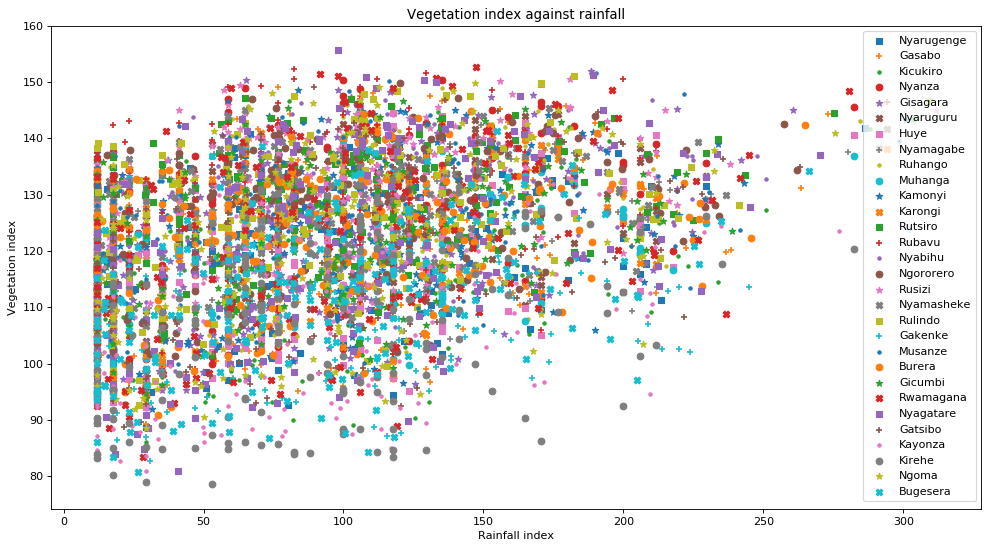

In [8]:
# Make a scatter plot of vegetation index against rainfall for the same months
marker = itertools.cycle((',', '+', '.', 'o', '*','X')) 

# Starting at index 4 removes data for JAN, FEB, MAR and APR in 2000
df_Rain = df_transpose_RainFall.iloc[4:] # Starting at index 5 removes data for JAN, FEB, MAR and APR in 2000

# Starting at index 4 removes data for JAN, FEB, MAR and APR in 2000
df_veg = df_trans_vegetation.iloc[4:]

district_names = df_transpose_RainFall.columns[:-1]
figure(num=None, figsize=(15, 8), dpi=80, facecolor='w', edgecolor='k')
for district in district_names:
    plt.scatter(df_Rain[district],df_veg[district] , label=district,marker = next(marker))
plt.legend(loc='best')
plt.xlabel('Rainfall index')
plt.ylabel('Vegetation index')
plt.title('Vegetation index against rainfall')


# Question 6

In [9]:
# Starting at index 4 removes data for JAN, FEB, MAR and APR in 2000
df_Rain = df_transpose_RainFall.iloc[4:] 

# Starting at index 4 removes data for JAN, FEB, MAR and APR in 2000
df_veg = df_trans_vegetation.iloc[4:]

district_names = df_Rain.columns[:-1]

correlations = pd.DataFrame(index=district_names)

#Correlation without delay
corr = df_Rain.corrwith(df_veg) 
correlations['0'] = corr.values

# Correlation with delay
for k in np.arange(1,13):
    corr = df_Rain.shift(periods=-k).iloc[:-k].corrwith(df_veg.iloc[:-k])
    
#     corr = df_Rain.iloc[k:].corrwith(df_veg.iloc[:-k])
    
    correlations[str(k)] = corr.values

rows,cols = correlations.shape
optimal_Ks_corrs = [] 

# Finding optimal k for each district
for row in np.arange(rows):
    max_corr = correlations.iloc[row].max()
    optimal_k = 0
    for k in np.arange(cols):
        if(correlations.iloc[row,k] == max_corr):
            optimal_k = k 
            break
    optimal_Ks_corrs.append([correlations.index[row],optimal_k,max_corr])  

optimal_Ks_corrs = pd.DataFrame(optimal_Ks_corrs,columns=['District','Optimal k','correlation'])
optimal_Ks_corrs

,District,Optimal k,correlation
0,Nyarugenge,11,0.508507
1,Gasabo,11,0.603375
2,Kicukiro,11,0.549587
3,Nyanza,11,0.557065
4,Gisagara,11,0.585309
5,Nyaruguru,11,0.410753
6,Huye,11,0.528240
7,Nyamagabe,11,0.441508
8,Ruhango,11,0.551489
9,Muhanga,11,0.526593


# Question 7

In [18]:
# Starting at index 4 removes data for JAN, FEB, MAR and APR in 2000
df_Rain = df_transpose_RainFall.iloc[4:] 

# Starting at index 4 removes data for JAN, FEB, MAR and APR in 2000
df_veg = df_trans_vegetation.iloc[4:]

district_names = df_Rain.columns[:-1]

#Simple Moving average and Correlation
correlations = pd.DataFrame(index=district_names)

#SMA and Correlation for K = 1
df_sma = df_Rain.rolling(1).mean() #SMA
corr = df_sma.corrwith(df_veg.iloc[:,:-1])
correlations[str(1)] = corr.values

for k in np.arange(2,13):
    df_sma = df_Rain.rolling(k).mean().iloc[k-1:] #SMA
    corr = df_sma.corrwith(df_veg.iloc[:-k+1,:-1])
    correlations[str(k)] = corr.values

plt.show()


#Plotting correlations against k

rows,cols = correlations.shape
opt_Ks_sma = [] 

figure(num=None, figsize=(15, 8), dpi=80, facecolor='w', edgecolor='k')
for row in np.arange(rows):
    plt.scatter(np.arange(1,13),correlations.iloc[row])
    
    max_corr = correlations.iloc[row].max()
    optimal_k = 0
    for k in np.arange(1,13):
        if(correlations[str(k)].iloc[row] == max_corr):
            optimal_k = k 
            break
    opt_Ks_sma.append([correlations.index[row],optimal_k,max_corr])  

plt.xticks(np.arange(1,13))
plt.show()

opt_Ks_sma = pd.DataFrame(opt_Ks_sma,columns=['District','k','correlation'])
opt_Ks_sma.groupby('k').count()

NotImplementedError: ops for Rolling for this dtype datetime64[ns] are not implemented

# Question 8

In [14]:
def polyfit(x, y, degree):
    results = {}

    coeffs = np.polyfit(x, y, degree)

    # r-squared
    p = np.poly1d(coeffs)
    # fit values, and mean
    yhat = p(x)                         # or [p(z) for z in x]
    ybar = np.sum(y)/len(y)          # or sum(y)/len(y)
    ssreg = np.sum((yhat-ybar)**2)   # or sum([ (yihat - ybar)**2 for yihat in yhat])
    sstot = np.sum((y - ybar)**2)    # or sum([ (yi - ybar)**2 for yi in y])
    
    rmse = np.sqrt(mean_squared_error(y, yhat))
    adj_rsquared = 1 - (1 - (ssreg / sstot)) * (len(y) - 1) / (len(y) - x[1] - 1)
    rsquared = r2_score(y, yhat)
    
    results['RSquared'] = rsquared
    results['RMSE'] = rmse
    results['Adj_RSquared'] = adj_rsquared

    return results



######### Preparing data #########

df_Rain = df_transpose_RainFall.iloc[4:,:-1] 
df_veg = df_trans_vegetation.iloc[4:,:-1]

# Original Rainfall data
df_rainfall = df_Rain.to_numpy()
df_vegetation = df_veg.to_numpy()

# Delayed Rainfall data
optimal_k = 11 # Optimal k which gives maximum correlation coefficients
df_delayed_rainfall_data = df_Rain.shift(periods=-optimal_k).iloc[:-optimal_k].to_numpy()
df_d_vegetation_data = df_veg.iloc[:-optimal_k].to_numpy()
# #Simple Moving Averages Rainfall data
optimal_k = 3 # Optimal k which gives maximum correlation coefficients
df_sma_data = df_Rain.rolling(optimal_k).mean().iloc[optimal_k-1:].to_numpy()
df_vegetation_data = df_veg.iloc[:-optimal_k+1].to_numpy()

### Linear model

In [15]:
polynomial_degree = 1

# Original Rainfall data
rainfall_metrics_1 = polyfit(df_rainfall.flatten(), df_vegetation.flatten(), polynomial_degree)

# Delayed Rainfall data
delayed_rainfall_metrics_1 = polyfit(df_delayed_rainfall_data.flatten(), df_d_vegetation_data.flatten(), polynomial_degree)

# SMA Rainfall data
sma_rainfall_metrics_1 = polyfit(df_sma_data.flatten(), df_vegetation_data.flatten(), polynomial_degree)


data = []
data.append([rainfall_metrics_1["RSquared"],rainfall_metrics_1["RMSE"],rainfall_metrics_1["Adj_RSquared"]])
data.append([delayed_rainfall_metrics_1["RSquared"],delayed_rainfall_metrics_1["RMSE"],delayed_rainfall_metrics_1["Adj_RSquared"]])
data.append([sma_rainfall_metrics_1["RSquared"],sma_rainfall_metrics_1["RMSE"],sma_rainfall_metrics_1["Adj_RSquared"]])

df_table = pd.DataFrame(data,columns=['RSquared','RMSE','Adj RSquared'],index=['Rainfall','Delayed rainfall','SMA rainfall']) 
df_table

,RSquared,RMSE,Adj RSquared
Rainfall,0.109453,13.197640,0.096635
Delayed rainfall,0.261923,12.095578,0.245784
SMA rainfall,0.007062,13.985964,0.000403


### Quadratic model

In [ ]:
polynomial_degree = 2

#Original Rainfall data
rainfall_metrics_2 = polyfit(df_rainfall.flatten(), df_vegetation.flatten(), polynomial_degree)

#Delayed Rainfall data
delayed_rainfall_metrics_2 = polyfit(df_delayed_rainfall_data.flatten(), df_d_vegetation_data.flatten(), polynomial_degree)

#SMA Rainfall data
sma_rainfall_metrics_2 = polyfit(df_sma_data.flatten(), df_vegetation_data.flatten(), polynomial_degree)

data = []
data.append([rainfall_metrics_2["RSquared"],rainfall_metrics_2["RMSE"],rainfall_metrics_2["Adj_RSquared"]])
data.append([delayed_rainfall_metrics_2["RSquared"],delayed_rainfall_metrics_2["RMSE"],delayed_rainfall_metrics_2["Adj_RSquared"]])
data.append([sma_rainfall_metrics_2["RSquared"],sma_rainfall_metrics_2["RMSE"],sma_rainfall_metrics_2["Adj_RSquared"]])

df_table = pd.DataFrame(data,columns=['RSquared','RMSE','Adj RSquared'],index=['Rainfall','Delayed rainfall','SMA rainfall']) 
df_table

### Cubic model

In [ ]:
polynomial_degree = 3

#Original Rainfall data
rainfall_metrics_3 = polyfit(df_rainfall.flatten(), df_vegetation.flatten(), polynomial_degree)

#Delayed Rainfall data
delayed_rainfall_metrics_3 = polyfit(df_delayed_rainfall_data.flatten(), df_d_vegetation_data.flatten(), polynomial_degree)

#SMA Rainfall data
sma_rainfall_metrics_3 = polyfit(df_sma_data.flatten(), df_vegetation_data.flatten(), polynomial_degree)

data = []
data.append([rainfall_metrics_3["RSquared"],rainfall_metrics_3["RMSE"],rainfall_metrics_3["Adj_RSquared"]])
data.append([delayed_rainfall_metrics_3["RSquared"],delayed_rainfall_metrics_3["RMSE"],delayed_rainfall_metrics_3["Adj_RSquared"]])
data.append([sma_rainfall_metrics_3["RSquared"],sma_rainfall_metrics_3["RMSE"],sma_rainfall_metrics_3["Adj_RSquared"]])

df_table = pd.DataFrame(data,columns=['RSquared','RMSE','Adj RSquared'],index=['Rainfall','Delayed rainfall','SMA rainfall']) 
df_table

# Question 9

In [27]:
def polyfit(x_data, y_data, degree):
    x = x_data.flatten()
    y = y_data.flatten()
    
    results = {}
    
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

    coeffs = np.polyfit(x_train, y_train, degree)

    model = np.poly1d(coeffs)
    
    ####### Testing Model #######
    # fit values, and mean
    yhat = model(x_test)                         #predicted
    ybar = np.sum(y_test)/len(y_test)          
    ssreg = np.sum((yhat-ybar)**2)   
    sstot = np.sum((y_test - ybar)**2)    
    
    rmse =np.sqrt(mean_squared_error(y_test, yhat))
    
    adj_rsquared = 1 - (1 - (ssreg / sstot)) * (len(y_test) - 1) / (len(y_test) - x_test[1] - 1)
    rsquared = r2_score(y_test, yhat)
    
    results['RSquared'] = rsquared
    results['RMSE'] = rmse
    results['Adj_RSquared'] = adj_rsquared
    results['Prediction'] = yhat
    results['Xtest'] = x_test

    return results

######### Preparing data #########

df_Rain = df_transpose_RainFall.iloc[4:,:-1] 
df_veg = df_trans_vegetation.iloc[4:,:-1]

# Original Rainfall data
df_rainfall = df_Rain.to_numpy()
df_vegetation = df_veg.to_numpy()

# Delayed Rainfall data
optimal_k = 11 # Optimal k which gives maximum correlation coefficients
df_delayed_rainfall_data = df_Rain.shift(periods=-optimal_k).iloc[:-optimal_k].to_numpy()
df_d_vegetation_data = df_veg.iloc[:-optimal_k].to_numpy()

#Simple Moving Averages Rainfall data
sma_optimal_k = 3 # Optimal k which gives maximum correlation coefficients
df_sma_data = df_Rain.rolling(sma_optimal_k).mean().iloc[sma_optimal_k-1:].to_numpy()
df_vegetation_data = df_veg.iloc[:-sma_optimal_k+1].to_numpy()

#Delayed Simple Moving Average
d_sma_data = df_Rain.rolling(sma_optimal_k).mean().iloc[sma_optimal_k-1:].shift(periods=-optimal_k).iloc[:-optimal_k]
d_vegetation_data = df_veg.iloc[:-sma_optimal_k+1].iloc[:-optimal_k]

delayed_sma_rain = d_sma_data.to_numpy()
d_s_veget_data = d_vegetation_data.to_numpy()

### Linear Model

In [28]:
polynomial_degree = 1

# Original Rainfall data
rainfall_metrics_1 = polyfit(df_rainfall, df_vegetation, polynomial_degree)

# Delayed Rainfall data
delayed_rainfall_metrics_1 = polyfit(df_delayed_rainfall_data, df_d_vegetation_data, polynomial_degree)

# SMA Rainfall data
sma_rainfall_metrics_1 = polyfit(df_sma_data, df_vegetation_data, polynomial_degree)

# Delayed SMA
delayed_sma_rainfall_metrics_1 = polyfit(delayed_sma_rain, d_s_veget_data, polynomial_degree)

data = []
data.append([rainfall_metrics_1["RSquared"],rainfall_metrics_1["RMSE"],rainfall_metrics_1["Adj_RSquared"]])
data.append([delayed_rainfall_metrics_1["RSquared"],delayed_rainfall_metrics_1["RMSE"],delayed_rainfall_metrics_1["Adj_RSquared"]])
data.append([sma_rainfall_metrics_1["RSquared"],sma_rainfall_metrics_1["RMSE"],sma_rainfall_metrics_1["Adj_RSquared"]])
data.append([delayed_sma_rainfall_metrics_1["RSquared"],delayed_sma_rainfall_metrics_1["RMSE"],delayed_sma_rainfall_metrics_1["Adj_RSquared"]])

df_table_linear = pd.DataFrame(data,columns=['RSquared','RMSE','Adj_RSquared'],index=['Rainfall','Delayed rainfall','SMA rainfall','Delayed SMA rainfall']) 
df_table_linear

,RSquared,RMSE,Adj_RSquared
Rainfall,0.122493,12.920812,0.006889
Delayed rainfall,0.280575,11.956599,0.055923
SMA rainfall,0.011307,13.884786,-0.149037
Delayed SMA rainfall,0.103378,13.356475,0.028291


### Quadratic Model

In [29]:
polynomial_degree = 2

#Original Rainfall data
rainfall_metrics_2 = polyfit(df_rainfall, df_vegetation, polynomial_degree)

#Delayed Rainfall data
delayed_rainfall_metrics_2 = polyfit(df_delayed_rainfall_data, df_d_vegetation_data, polynomial_degree)

#SMA Rainfall data
sma_rainfall_metrics_2 = polyfit(df_sma_data, df_vegetation_data, polynomial_degree)

# Delayed SMA
delayed_sma_rainfall_metrics_1 = polyfit(delayed_sma_rain, d_s_veget_data, polynomial_degree)

data = []
data.append([rainfall_metrics_2["RSquared"],rainfall_metrics_2["RMSE"],rainfall_metrics_2["Adj_RSquared"]])
data.append([delayed_rainfall_metrics_2["RSquared"],delayed_rainfall_metrics_2["RMSE"],delayed_rainfall_metrics_2["Adj_RSquared"]])
data.append([sma_rainfall_metrics_2["RSquared"],sma_rainfall_metrics_2["RMSE"],sma_rainfall_metrics_2["Adj_RSquared"]])
data.append([delayed_sma_rainfall_metrics_1["RSquared"],delayed_sma_rainfall_metrics_1["RMSE"],delayed_sma_rainfall_metrics_1["Adj_RSquared"]])

df_table_quad = pd.DataFrame(data,columns=['RSquared','RMSE','Adj_RSquared'],index=['Rainfall','Delayed rainfall','SMA rainfall','Delayed SMA rainfall']) 
df_table_quad

,RSquared,RMSE,Adj_RSquared
Rainfall,0.122350,13.005111,0.077204
Delayed rainfall,0.288723,11.946047,0.197522
SMA rainfall,-0.011733,14.159969,-0.006631
Delayed SMA rainfall,0.082664,13.816723,-0.027845


### Cubic Model

In [30]:
polynomial_degree = 3

#Original Rainfall data
rainfall_metrics_3 = polyfit(df_rainfall, df_vegetation, polynomial_degree)

#Delayed Rainfall data
delayed_rainfall_metrics_3 = polyfit(df_delayed_rainfall_data, df_d_vegetation_data, polynomial_degree)

#SMA Rainfall data
sma_rainfall_metrics_3 = polyfit(df_sma_data, df_vegetation_data, polynomial_degree)

# Delayed SMA
delayed_sma_rainfall_metrics_1 = polyfit(delayed_sma_rain, d_s_veget_data, polynomial_degree)

data = []
data.append([rainfall_metrics_3["RSquared"],rainfall_metrics_3["RMSE"],rainfall_metrics_3["Adj_RSquared"]])
data.append([delayed_rainfall_metrics_3["RSquared"],delayed_rainfall_metrics_3["RMSE"],delayed_rainfall_metrics_3["Adj_RSquared"]])
data.append([sma_rainfall_metrics_3["RSquared"],sma_rainfall_metrics_3["RMSE"],sma_rainfall_metrics_3["Adj_RSquared"]])
data.append([delayed_sma_rainfall_metrics_1["RSquared"],delayed_sma_rainfall_metrics_1["RMSE"],delayed_sma_rainfall_metrics_1["Adj_RSquared"]])

df_table_cubic = pd.DataFrame(data,columns=['RSquared','RMSE','Adj_RSquared'],index=['Rainfall','Delayed rainfall','SMA rainfall','Delayed SMA rainfall']) 
df_table_cubic

,RSquared,RMSE,Adj_RSquared
Rainfall,0.100823,13.315928,-0.024888
Delayed rainfall,0.366046,11.373811,0.164794
SMA rainfall,0.008083,14.220764,-0.119360
Delayed SMA rainfall,0.109471,13.359697,-0.042548


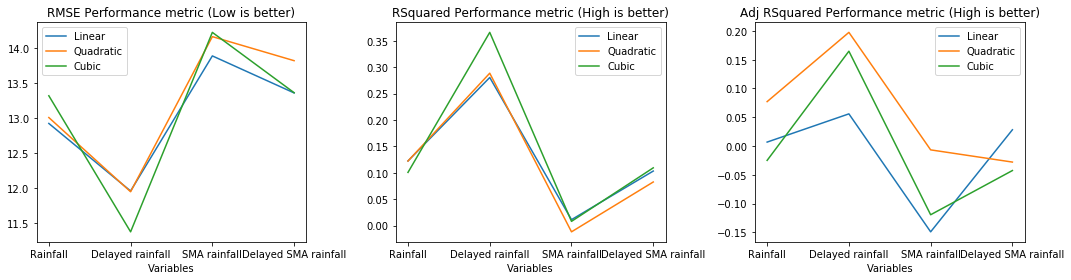

In [32]:
## EValuating Models performance for Each variable ##
#####################################################

fig, (ax1, ax2,ax3) = plt.subplots(1, 3,figsize=(15,4))

x = ['Rainfall','Delayed rainfall','SMA rainfall','Delayed SMA rainfall']

ax1.plot(x,df_table_linear.RMSE,label='Linear')
ax1.plot(x,df_table_quad.RMSE,label='Quadratic')
ax1.plot(x,df_table_cubic.RMSE,label='Cubic')
ax1.legend()
ax1.set_xlabel('Variables')
ax1.set_title("RMSE Performance metric (Low is better)")

ax2.plot(x,df_table_linear.RSquared,label='Linear')
ax2.plot(x,df_table_quad.RSquared,label='Quadratic')
ax2.plot(x,df_table_cubic.RSquared,label='Cubic')
ax2.legend()
ax2.set_xlabel('Variables')
ax2.set_title("RSquared Performance metric (High is better)")

ax3.plot(x,df_table_linear.Adj_RSquared,label='Linear')
ax3.plot(x,df_table_quad.Adj_RSquared,label='Quadratic')
ax3.plot(x,df_table_cubic.Adj_RSquared,label='Cubic')
ax3.legend()
ax3.set_xlabel('Variables')
ax3.set_title("Adj RSquared Performance metric (High is better)")

plt.tight_layout()

# Question 10

In [20]:
##################################################################
## From Q9, the optimal feature or variable was Delayed Rainfall##
##################################################################
def performanceMetrics(actual,prediction):
    results = {}
    y_test = actual
    yhat = prediction
    ybar = np.sum(y_test)/len(y_test)          
    ssreg = np.sum((yhat-ybar)**2)   
    sstot = np.sum((y_test - ybar)**2)    
    
    rmse =np.sqrt(mean_squared_error(y_test, yhat))
    
    adj_rsquared = 1 - (1 - (ssreg / sstot)) * (len(y_test) - 1) / (len(y_test) - x_test[1] - 1)
    rsquared = r2_score(y_test, yhat)
    
    results['RSquared'] = rsquared
    results['RMSE'] = rmse
    results['Adj_RSquared'] = adj_rsquared
    results['Prediction'] = yhat
    return results

def polyfitWithSummary(x_train,x_test,y_train,y_test, degree):
    results = {}

    coeffs = np.polyfit(x_train, y_train, degree)

    model = np.poly1d(coeffs)
    
    ####### Testing Model #######
    # fit values, and mean
    yhat = model(x_test)                         #predicted

    return performanceMetrics(y_test,yhat)

######### Preparing data #########

df_Rain = df_transpose_RainFall.iloc[4:,:-1] 
df_veg = df_trans_vegetation.iloc[4:,:-1]

# Delayed Rainfall data
optimal_k = 11 # Optimal k which gives maximum correlation coefficients as from Question 6
df_d_rain_data = df_Rain.shift(periods=-optimal_k).iloc[:-optimal_k].to_numpy() # Delayed rainfall data
df_d_veg_data = df_veg.iloc[:-optimal_k].to_numpy() # Vegetation data

# Splitting data for Cross Validation
x_train,x_test,y_train,y_test = train_test_split(df_d_rain_data.flatten(),df_d_veg_data.flatten(),test_size=0.2)

### Linear Model

Text(0.5, 1.0, 'Linear model with vegetation against the delayed rainfall feature')

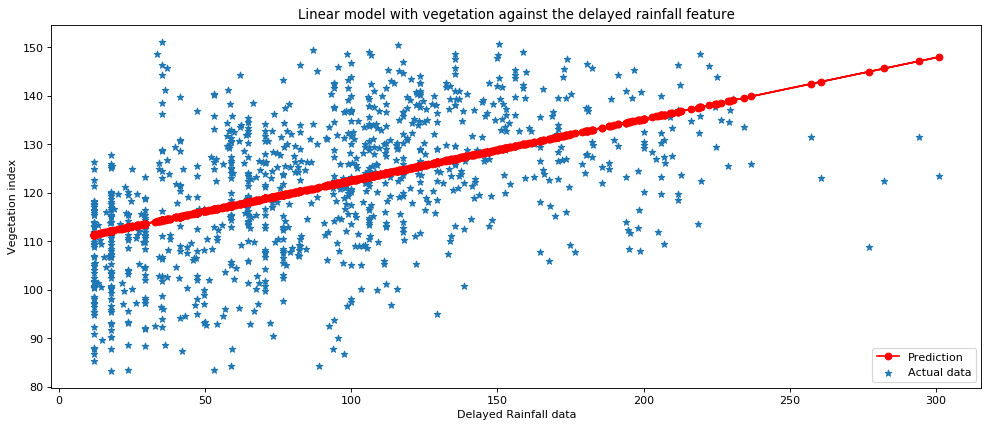

In [21]:
#### Linear Model ####
p_degree = 1 # Polynomial degree for Linear model
linear_summary =  polyfitWithSummary(x_train,x_test,y_train,y_test, p_degree) 

figure(num=None, figsize=(15, 6), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(x_test,y_test,label='Actual data',marker = '*')
plt.plot(x_test,linear_summary['Prediction'], color='r',label='Prediction',marker = 'o')
plt.legend(loc='best')
plt.ylabel('Vegetation index')
plt.xlabel('Delayed Rainfall data')
plt.title('Linear model with vegetation against the delayed rainfall feature')

### Quadratic Model

Text(0.5, 1.0, 'Fitted Quadratic model with vegetation against the delayed rainfall feature')

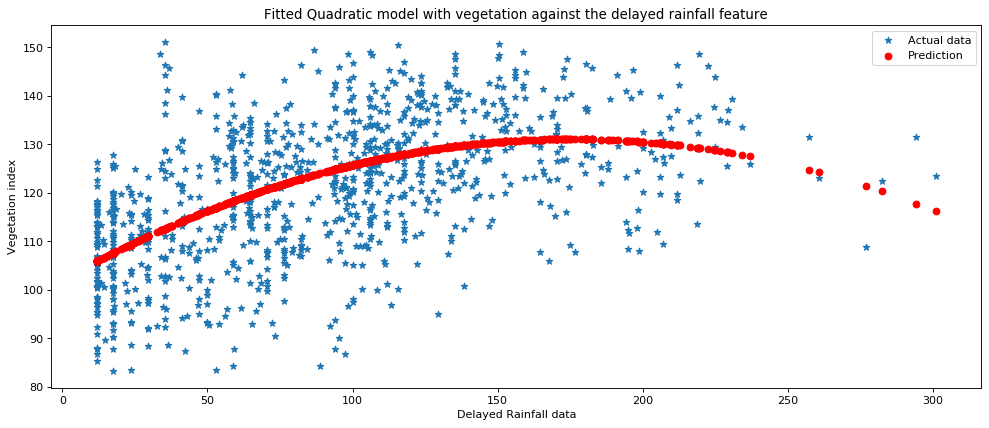

In [22]:
#### Quadratic Model ####
p_degree = 2 # Polynomial degree for Quadratic model
quadratic_summary = polyfitWithSummary(x_train,x_test,y_train,y_test, p_degree)


figure(num=None, figsize=(15, 6), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(x_test,y_test,label='Actual data',marker = '*')
plt.scatter(x_test,quadratic_summary['Prediction'],color='r',label='Prediction',marker = 'o')
plt.legend(loc='best')
plt.ylabel('Vegetation index')
plt.xlabel('Delayed Rainfall data')
plt.title('Fitted Quadratic model with vegetation against the delayed rainfall feature')

### Cubic Model

Text(0.5, 1.0, 'Fitted Cubic model with vegetation against the delayed rainfall feature')

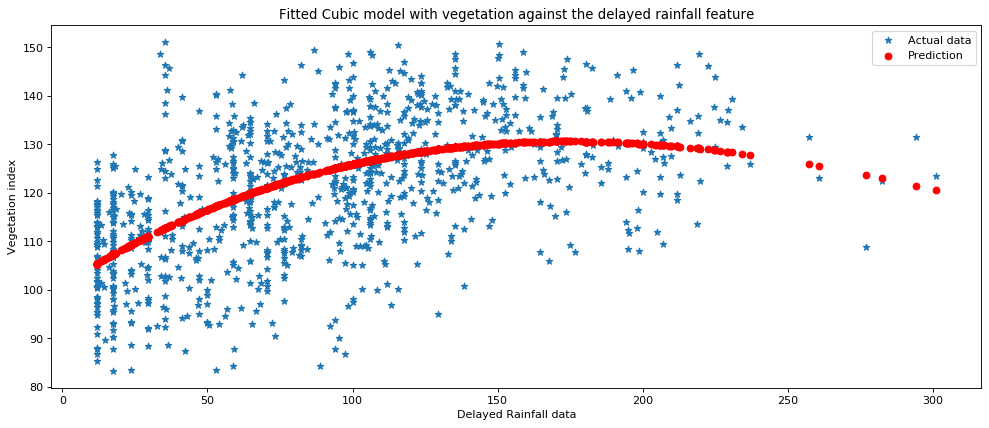

In [23]:
#### Cubic Model ####
p_degree = 3 # Polynomial degree for Cubic model
cubic_summary = polyfitWithSummary(x_train,x_test,y_train,y_test, p_degree)

figure(num=None, figsize=(15, 6), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(x_test,y_test,label='Actual data',marker = '*')
plt.scatter(x_test,cubic_summary['Prediction'],color='r',label='Prediction',marker = 'o')
plt.legend(loc='best')
plt.ylabel('Vegetation index')
plt.xlabel('Delayed Rainfall data')
plt.title('Fitted Cubic model with vegetation against the delayed rainfall feature')

### Kernel Ridge

Text(0.5, 1.0, 'Fitted Kernel Ridge model with vegetation against the delayed rainfall feature')

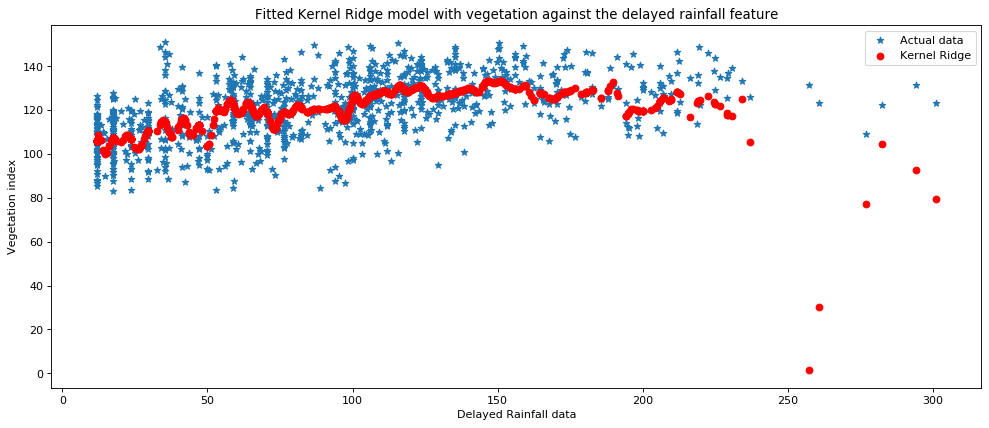

In [24]:
#### Non-Paramatric Model 1: Kernel ridge regression ####
from sklearn.kernel_ridge import KernelRidge

k_x_train = np.reshape(x_train, (-1, 1))  #Converting to 2D array because fit does not accept 1D array. 
k_x_test = np.reshape(x_test, (-1, 1))
clf = KernelRidge(kernel='rbf', gamma=0.1)
clf.fit(k_x_train, y_train)
y_kernel_pred = clf.predict(k_x_test)
kernel_metrics = performanceMetrics(y_test,y_kernel_pred)

figure(num=None, figsize=(15, 6), dpi=80, facecolor='w', edgecolor='k')
marker = itertools.cycle((',','X', '.', 'o', '*','+'))
plt.scatter(x_test,y_test,label='Actual data',marker = '*')
plt.scatter(x_test,y_kernel_pred,color='r',label='Kernel Ridge',marker = 'o')
plt.legend(loc='best')
plt.ylabel('Vegetation index')
plt.xlabel('Delayed Rainfall data')
plt.title('Fitted Kernel Ridge model with vegetation against the delayed rainfall feature')

### Decision Tree Regression

Text(0.5, 1.0, 'Fitted Decision Tree model with vegetation against the delayed rainfall feature')

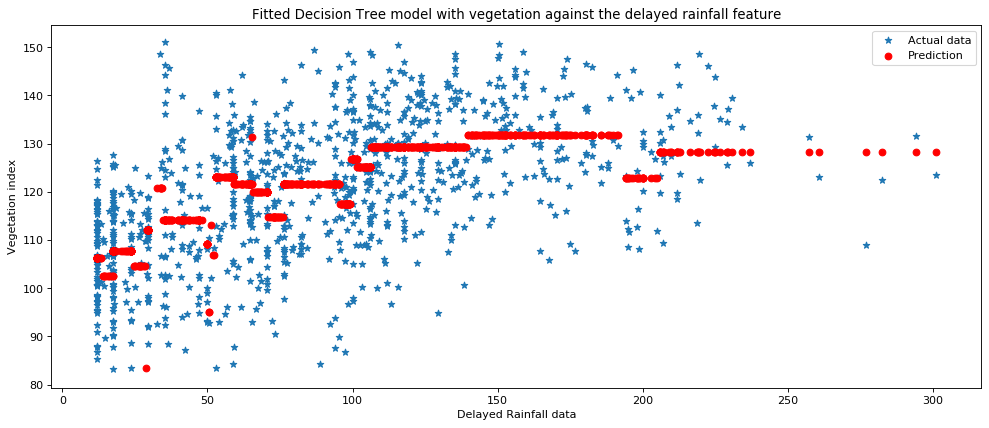

In [25]:
#### Non-Paramatric Model 2: Decision Tree Regression ####
from sklearn.tree import DecisionTreeRegressor

t_x_train = np.reshape(x_train, (-1, 1))  #Converting to 2D array because fit does not accept 1D array. 
t_x_test = np.reshape(x_test, (-1, 1))

clf = DecisionTreeRegressor(max_depth=5)
clf.fit(t_x_train, y_train)
y_tree_pred = clf.predict(t_x_test)

tree_metrics = performanceMetrics(y_test,y_tree_pred)

marker = itertools.cycle((',','X', '.', 'o', '*','+'))
figure(num=None, figsize=(15, 6), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(x_test,y_test,label='Actual data',marker = '*')
plt.scatter(x_test,y_tree_pred,color='r',label='Prediction',marker = 'o')
plt.legend(loc='best')
plt.ylabel('Vegetation index')
plt.xlabel('Delayed Rainfall data')
plt.title('Fitted Decision Tree model with vegetation against the delayed rainfall feature')

In [31]:
#### Displaying Metrics table for all Models ####
metrics_data = []
metrics_data.append([linear_summary['RSquared'],quadratic_summary['RSquared'],cubic_summary['RSquared'],kernel_metrics['RSquared'],tree_metrics['RSquared']])
metrics_data.append([linear_summary['RMSE'],quadratic_summary['RMSE'],cubic_summary['RMSE'],kernel_metrics['RMSE'],tree_metrics['RMSE']])

summary_table = pd.DataFrame(metrics_data,index=['RSquared','RMSE'],columns=['Linear','Quadratic','Cubic','Kernel Ridge','Decision tree'])
summary_table

,Linear,Quadratic,Cubic,Kernel Ridge,Decision tree
RSquared,0.257447,0.303649,0.302191,0.165345,0.302573
RMSE,12.413880,12.021481,12.034058,13.161254,12.030762
